In [8]:
import numpy as np
import pandas as pd

expiry = 'NearbyMonth'
IVdir = 'putIV'
OCRange = 1



IV_Data = pd.read_csv('./../../Data/Organized/{}/{}{}.csv'.format(IVdir, OCRange, expiry), \
                      encoding='Big5', index_col=False)
IV_matrix = np.array(IV_Data)

#以收盤價為基礎
column_names_closing  = ['期貨收盤價', '履約價', '買賣權', '無風險利率', '到期天數', '隱含波動率(收盤價)']
column_index_closing = [IV_Data.columns.get_loc(col) for col in column_names_closing]
IV_closing = IV_matrix[:, column_index_closing]





#以結算價為基礎
column_names_settlement  = ['期貨結算價', '履約價', '買賣權', '無風險利率', '到期天數', '隱含波動率(結算價)']
column_index_settlement = [IV_Data.columns.get_loc(col) for col in column_names_settlement]
IV_settlement = IV_matrix[:, column_index_settlement]
dates = np.unique(IV_matrix[:,0])

In [9]:
column_names_Futures = ['交易日期', '到期日期', '期貨開盤價', '期貨最高價', '期貨最低價', '期貨收盤價',\
                        '期貨結算價', '到期天數', '無風險利率']
column_index_Futures = [IV_Data.columns.get_loc(col) for col in column_names_Futures]
indices = [np.where(date == IV_matrix[:,0])[0][0] for date in dates]
Udata = IV_matrix[indices, :]
Udata = Udata[:, column_index_Futures]


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_11684\701814965.py:89: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\bgpa4\AppData\Local\Temp\ipykernel_11684\701814965.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


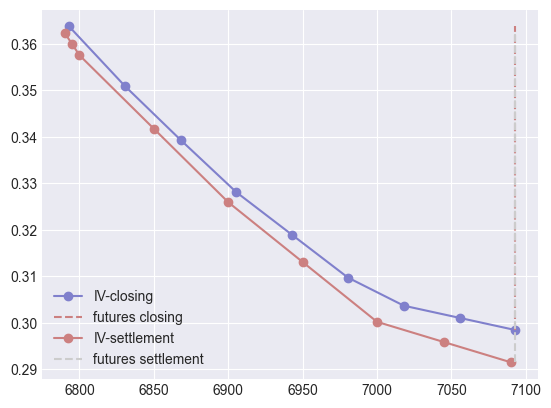

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_11684\701814965.py:89: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\bgpa4\AppData\Local\Temp\ipykernel_11684\701814965.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


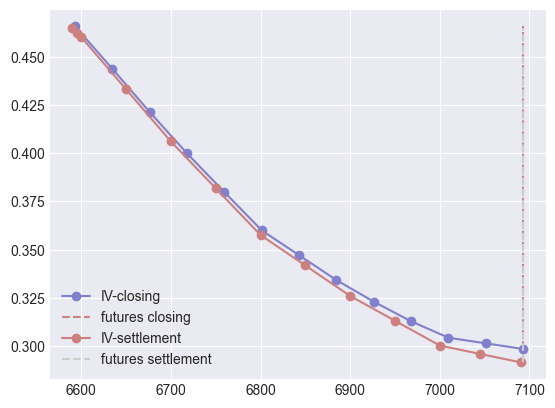

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_11684\701814965.py:89: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\bgpa4\AppData\Local\Temp\ipykernel_11684\701814965.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


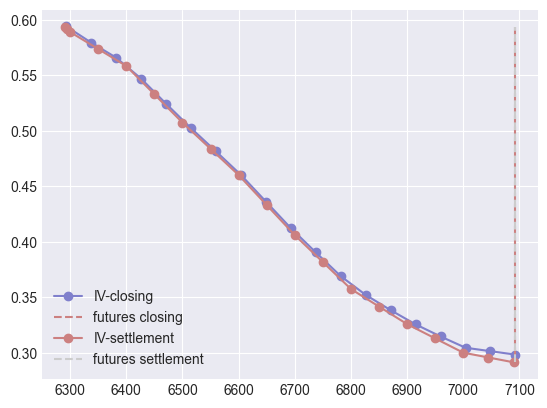

C:\Users\bgpa4\AppData\Local\Temp\ipykernel_11684\701814965.py:89: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
C:\Users\bgpa4\AppData\Local\Temp\ipykernel_11684\701814965.py:97: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


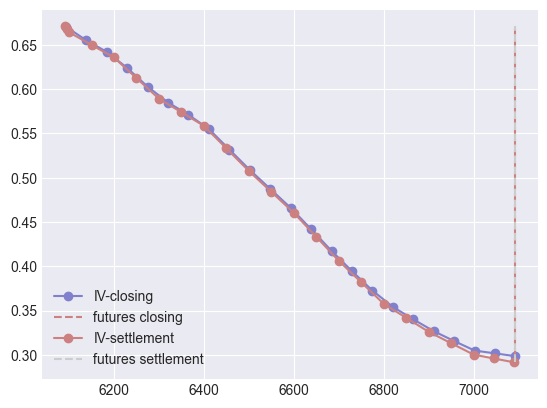

In [10]:
import os 
from function import interpolate_range, Bondfilter
import matplotlib.pyplot as plt
if IVdir not in os.listdir('./../../Data/Interpolate'):
    os.mkdir('./../../Data/Interpolate/{}'.format(IVdir))

if str(OCRange) not in os.listdir('./../../Data/Interpolate/{}'.format(IVdir)):
    os.mkdir('./../../Data/Interpolate/{}/{}'.format(IVdir, OCRange))

if IVdir == 'callIV':
    upper_range = [300, 500, 800, 1000]
    lower_range = [0, 0, 0, 0]

if IVdir == 'putIV':
    upper_range = [0, 0, 0, 0]
    lower_range = [300, 500, 800, 1000]

for j in range(len(upper_range)):
    K_nums_filter = np.zeros((len(dates), 2))
    K_nums = np.zeros((len(dates), 2))
    IV_K_days_closing = [[]] * len(dates)
    IV_K_days_settlement = [[]] * len(dates)

    for i in range(len(dates)):
        IV_K_day_closing = IV_matrix[IV_matrix[:,0] == dates[i]]
        day_closing = IV_K_day_closing[0,column_index_Futures[5]]
        K_upperbond = day_closing + upper_range[j] 
        K_lowerbond = day_closing - lower_range[j]
        IV_K_day_K, condition = Bondfilter(IV_K_day_closing[:,column_index_closing[1]], \
                                           K_lowerbond, K_upperbond)
        IV_K_day_closing_new = IV_K_day_closing[condition]

        IV_K_day_settlement =  IV_matrix[IV_matrix[:,0] == dates[i]]
        day_settlement = IV_K_day_settlement[0,column_index_Futures[6]]
        K_upperbond = day_settlement + upper_range[j]
        K_lowerbond = day_settlement- lower_range[j]
        IV_K_day_K, condition = Bondfilter(IV_K_day_settlement[:,column_index_settlement[1]], \
                                           K_lowerbond, K_upperbond)
        IV_K_day_settlement_new = IV_K_day_settlement[condition]

        K_nums_filter[i,0] = len(IV_K_day_closing_new)
        K_nums_filter[i,1] = len(IV_K_day_settlement_new)
        IV_K_days_closing[i] = IV_K_day_closing[:,\
                        [column_index_closing[1], column_index_closing[5]]]#履約價  隱含波動率
        IV_K_days_settlement[i] = IV_K_day_settlement[:,
                        [column_index_settlement[1],column_index_settlement[5]]]
    
    K_max_filter = int(K_nums_filter.max())
    K_num_day = K_max_filter+2
    IV_K_newMatrix = np.zeros((len(dates), K_num_day , 4))

    for i in range(len(IV_K_days_closing)):
        Kday = IV_K_days_closing[i][:,0].astype(float)
        IVday = IV_K_days_closing[i][:,1].astype(float)
        day_closing = Udata[i, 5]
        K_upperbond = day_closing + upper_range[j] 
        K_lowerbond = day_closing - lower_range[j]
        new_K, new_IV = interpolate_range(x=Kday, y=IVday, \
                    points=[K_lowerbond, K_upperbond], points_num=K_num_day , keep=False, kind='linear')
        IV_K_newMatrix[i,:, :2] = np.vstack((new_K, new_IV)).T

        Kday = IV_K_days_settlement[i][:,0].astype(float)
        IVday = IV_K_days_settlement[i][:,1].astype(float)
        day_settlement = Udata[i, 6]
        K_upperbond = day_settlement + upper_range[j] 
        K_lowerbond = day_settlement - lower_range[j]
        new_K, new_IV = interpolate_range(x=Kday, y=IVday, \
                                      points=[K_lowerbond, K_upperbond], points_num=K_num_day )
        IV_K_newMatrix[i, :, 2:] = np.vstack((new_K, new_IV)).T
    InterpolateMatrix1 = np.reshape(np.array(['1','1']*(len(Udata)*K_num_day )), (-1,2))
    InterpolateMatrix2 = np.zeros((len(Udata)*K_num_day , len(column_names_Futures)-2+4))
    InterpolateMatrix = np.hstack((InterpolateMatrix1, InterpolateMatrix2))
    for i in range(len(Udata)):
        InterpolateMatrix[i*K_num_day :(i+1)*K_num_day , :9] = Udata[i]
        InterpolateMatrix[i*K_num_day :(i+1)*K_num_day , 9:] = IV_K_newMatrix[i]
    columns_all = np.array(column_names_Futures)
    columns_K_IV_interp = np.array(['履約價(收盤價)', '隱含波動率(收盤價)', '履約價(結算價)', '隱含波動率(結算價)'])
    columns_all = np.hstack((np.array(column_names_Futures), columns_K_IV_interp))
    InterpolateData = pd.DataFrame(data=InterpolateMatrix, columns=columns_all)
    InterpolateData.to_csv(
        './../../Data/Interpolate/{}/{}/{}_{}.csv'.format(IVdir, OCRange, lower_range[j], upper_range[j]), \
        encoding='Big5', index=False)

    k = 10
    x = IV_K_newMatrix[k, :, 0]
    y = IV_K_newMatrix[k, :, 1]
    K_min_k = y.min()
    K_max_k = y.max()
    plt.style.use('seaborn-darkgrid')
    plt.plot(x, y, c = [0.5, 0.5, 0.8], marker='o', label = 'IV-closing')
    plt.plot([Udata[k, 5]]*2, [K_min_k, K_max_k], ls='--', c=[0.8, 0.5, 0.5], label='futures closing')

    x = IV_K_newMatrix[k, :, 2]
    y = IV_K_newMatrix[k, :, 3]
    K_min_k = y.min()
    K_max_k = y.max()
    plt.style.use('seaborn-darkgrid')
    plt.plot(x, y, c = [0.8, 0.5, 0.5], marker='o', label = 'IV-settlement')
    plt.plot([Udata[k, 5]]*2, [K_min_k, K_max_k], ls='--', c=[0.8, 0.8, 0.8], label='futures settlement')
    plt.legend()
    plt.show()


